<a href="https://colab.research.google.com/github/AlfaIV/Microwave-and-Antennas-LabWork/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%B0%D1%87_%D0%A1%D0%92%D0%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение необходимых библиотек

In [1]:
!pip install scikit-rf

In [2]:
import scipy.constants as const
import scipy.optimize as opt
import scipy.special as sp

from math import sqrt,sin,tan,cos,pi,radians,degrees,log,log10,atan

import sympy

import numpy as np

import matplotlib.pyplot as plt

import skrf as rf
rf_math = rf.mathFunctions

import IPython.display
from IPython.display import Markdown as md

# Исходное ТЗ

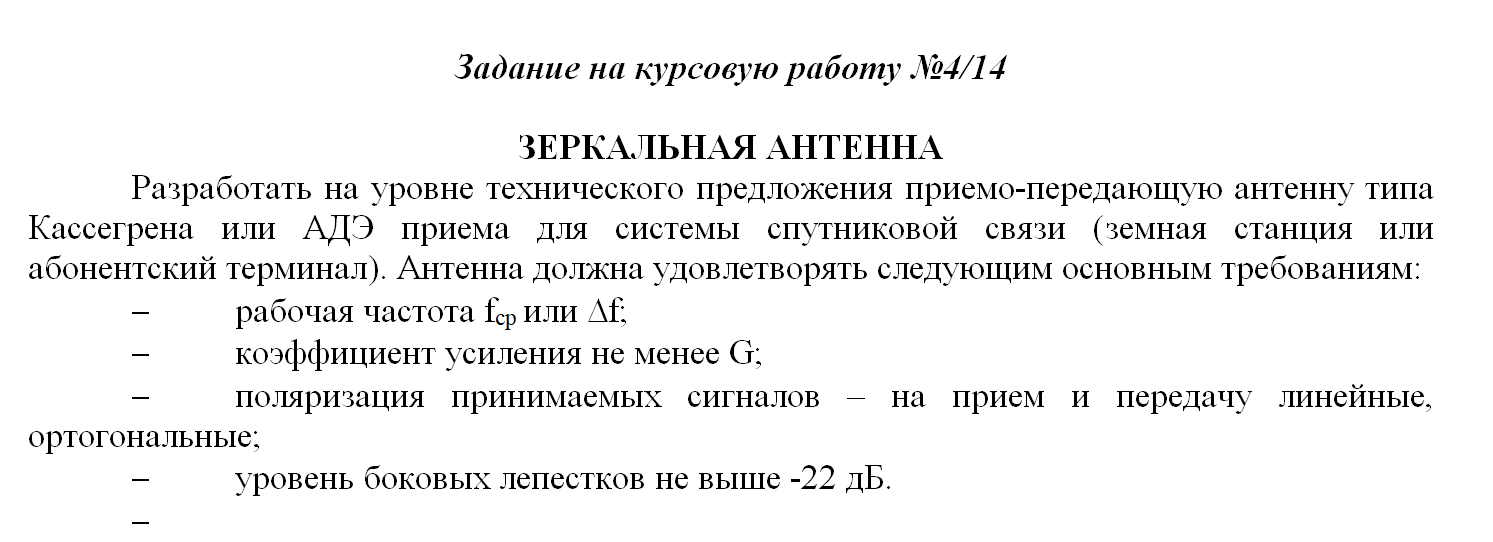

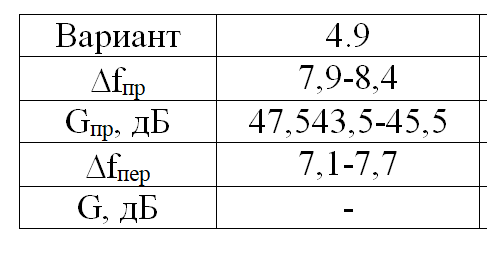

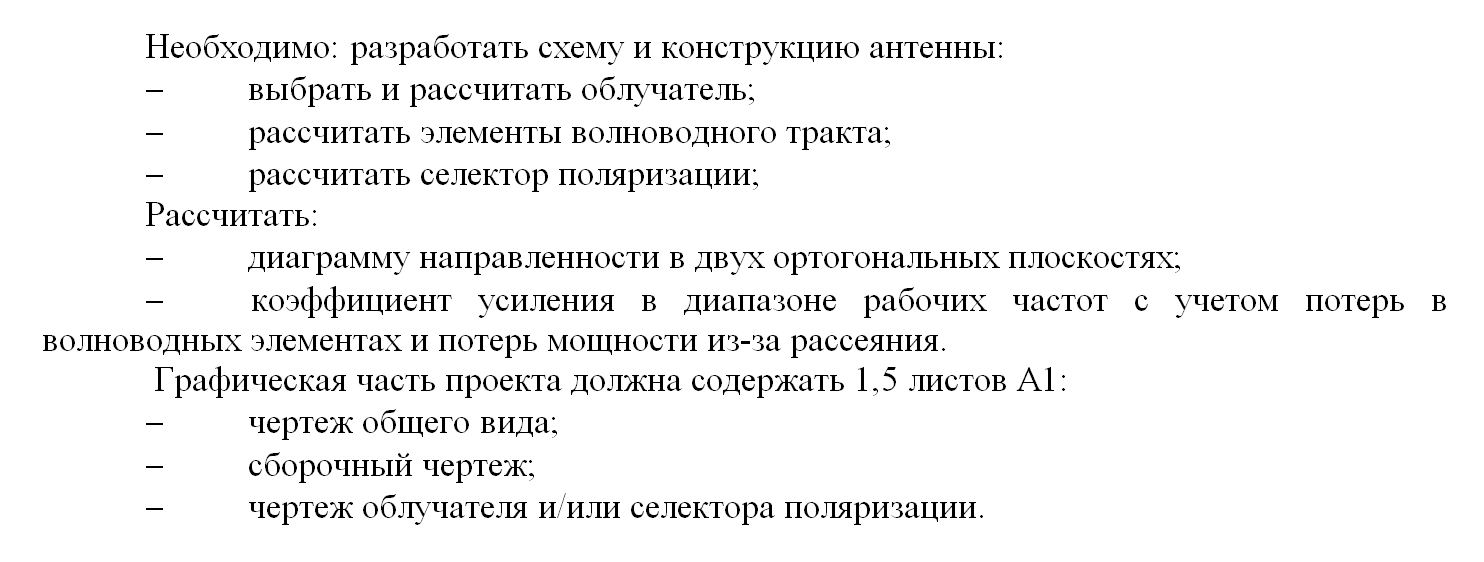

Зададим начальные условия расчета

In [3]:
f_lim = 8.3e9 #задаем частоту на заданном интервале
nu = 0.5 #КИП
G_lim_dB = 36 #КУ в дБ

# Расчет размеров антенны

In [4]:
#Функция перевода из дБ в разы
From_dB_10 = lambda x: 10**(x/10)

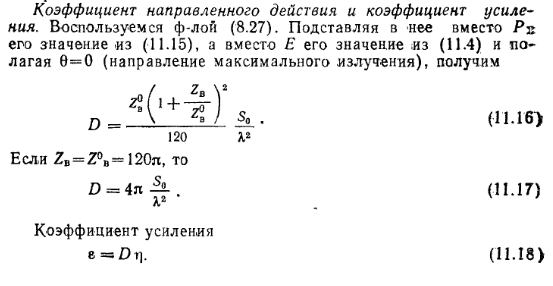

Найдем площадь, а затем диаметр излучателя используя КУ

In [5]:
G_lim = From_dB_10(G_lim_dB) #переводим КУ из дБ в разы
lambda_lim = const.c/f_lim #считаем соответвсующую длинну волны
S = G_lim*lambda_lim**2/(4*const.pi*nu) #считаем площадь эквивалентного раскрыва зеркала
D = sqrt(4*S/(const.pi)) # диаметр раскрыва S = pi*R^2 = pi*D^2/4
D_0 = D

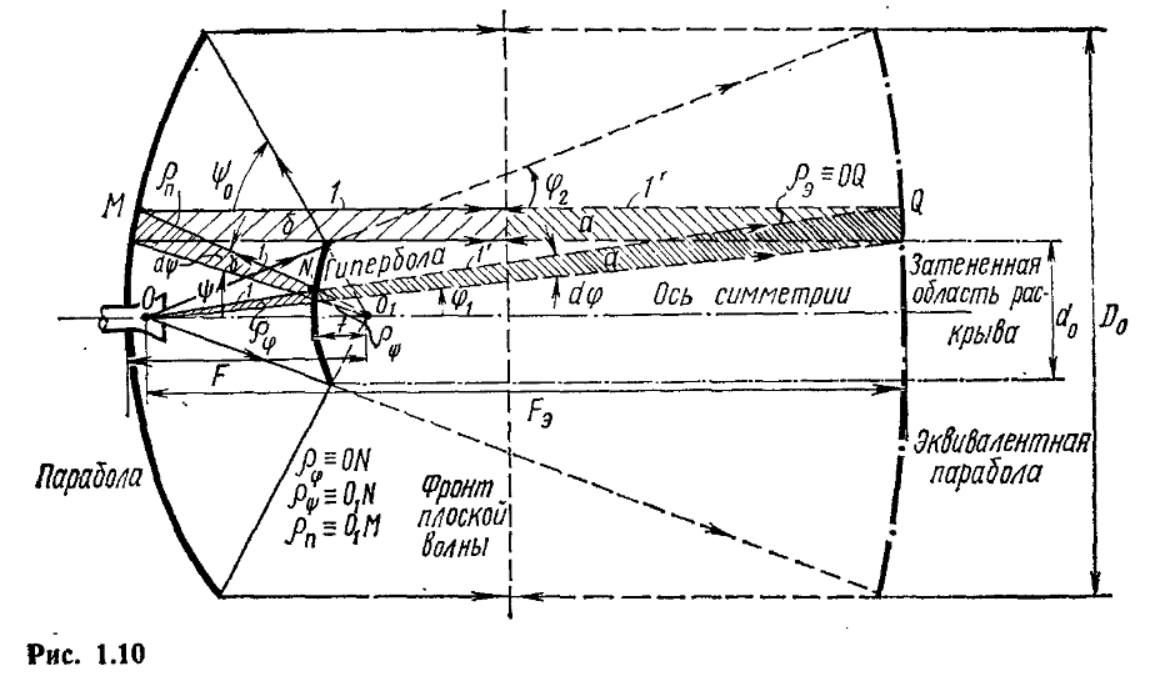

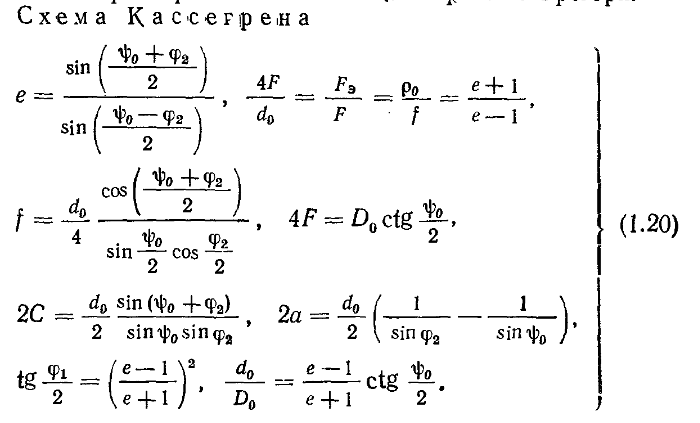

In [6]:
#psi_0 = rf_math.degree_2_radian(78.19)
#varphi_2 = rf_math.degree_2_radian(15)
psi_0 = rf_math.degree_2_radian(78)
varphi_2 = rf_math.degree_2_radian(10)
e = sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2)
d_0 = D_0*(e - 1)/(e + 1)*1/tan(psi_0/2)
f = d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2))
F = D_0/(4*tan(psi_0/2))
F_eqv = 4*F**2/d_0

In [7]:
[
 e == sin((psi_0 + varphi_2)/2)/sin((psi_0 - varphi_2)/2),
4*F/d_0 == F_eqv/F,
 f == d_0*cos((psi_0 + varphi_2)/2)/(4*sin(psi_0/2)*cos(varphi_2/2)),
 4*F == D_0/(tan(psi_0/2)),
 d_0/D_0 == (e - 1)/(e + 1)*1/tan(psi_0/2)
]

[True, True, True, True, True]

In [8]:
D_0/d_0

7.4952588597180405

In [9]:
#задание кртвой второго порядка
second_order_curve = lambda f,e,psi: f*(1 + e)/(1 + e*cos(psi))

#конвертация координат из полярной СК в декартову(прямоугольную)
def RPhi_to_XY(r,phi):
  return {"x":r*cos(phi),
          "y":r*sin(phi)}

#задание углов раствора зеркал
angel_of_mirror = lambda x,phi: tan(phi)*x 

In [10]:
psi_d = np.linspace(-psi_0,psi_0,1000)
psi_d_phi = np.linspace(-varphi_2,varphi_2,1000) 

In [11]:
small_mirror_d = np.vectorize(second_order_curve)(f,e,psi_d)
small_mirror_d = np.vectorize(RPhi_to_XY)(small_mirror_d,psi_d)
small_mirror_d_x = np.array([i["x"] for i in small_mirror_d])
small_mirror_d_y = np.array([i["y"] for i in small_mirror_d])

In [12]:
big_mirror_d = np.vectorize(second_order_curve)(F,e,psi_d)
big_mirror_d = np.vectorize(RPhi_to_XY)(big_mirror_d,psi_d)
big_mirror_d_x = np.array([i["x"] for i in big_mirror_d])
big_mirror_d_y = np.array([i["y"] for i in big_mirror_d])

In [13]:
eqv_mirror_d = np.vectorize(second_order_curve)(F_eqv,e,psi_d_phi)
eqv_mirror_d = np.vectorize(RPhi_to_XY)(eqv_mirror_d ,psi_d_phi)
eqv_mirror_d_x = np.array([i["x"] for i in eqv_mirror_d])
eqv_mirror_d_y = np.array([i["y"] for i in eqv_mirror_d])

In [14]:
eqv_mirror_angel_x = np.linspace(0,F_eqv,100)
eqv_mirror_angel_y = np.vectorize(angel_of_mirror)(eqv_mirror_angel_x,varphi_2)


main_mirror_angel_x = np.linspace(0,F,100)
main_mirror_angel_y = np.vectorize(angel_of_mirror)(main_mirror_angel_x,pi - psi_0)

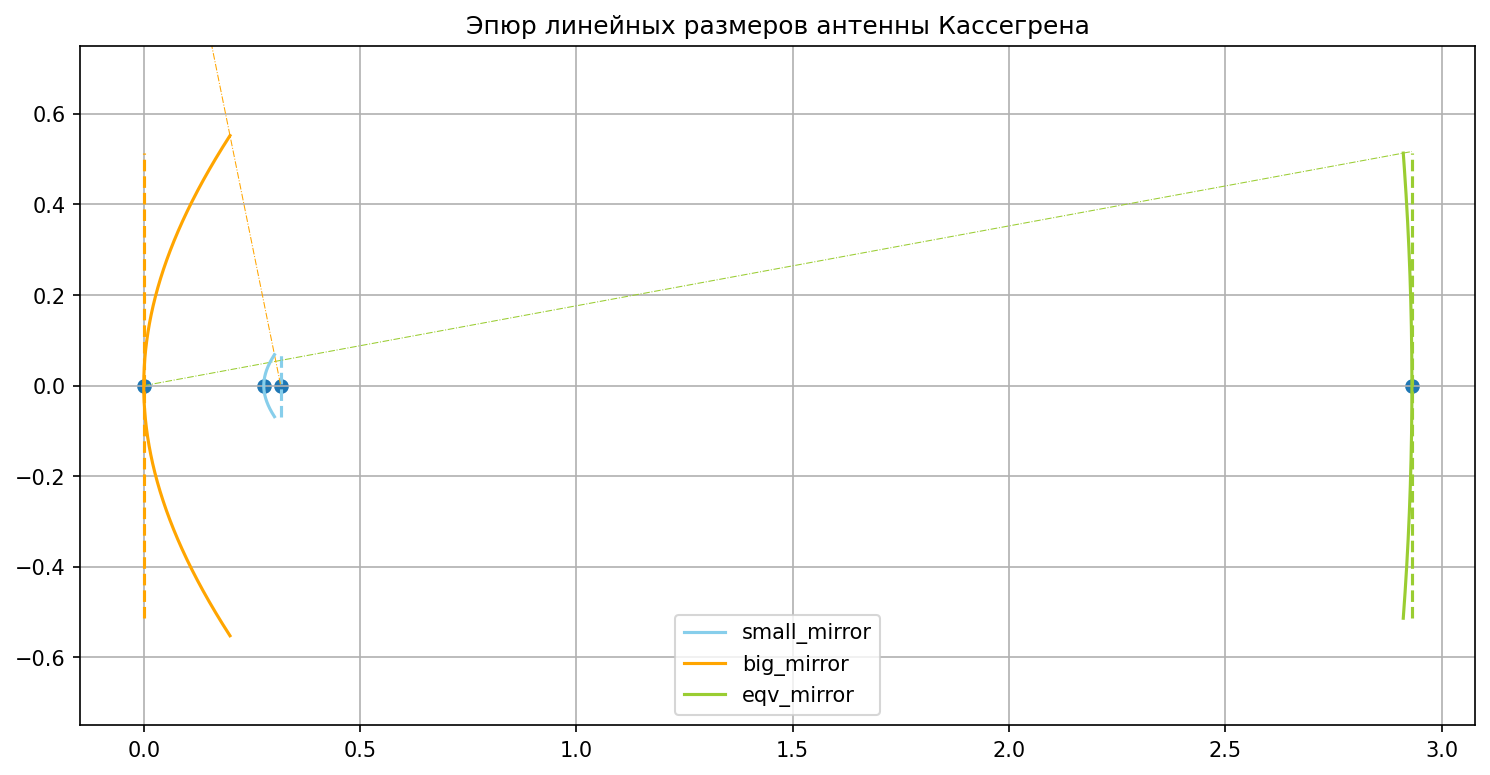

In [15]:
%matplotlib inline
plt.figure(dpi = 150,figsize = (12,6))
plt.title("Эпюр линейных размеров антенны Кассегрена")
#задаем фокусные расстояния
plt.scatter([F,0,F_eqv,F - f],
            [0,0,0    ,0],
            )

#задаем высоту зеркал
plt.vlines(0,-1*D_0/2,D_0/2,
           color = "orange",
           linestyles = "--",
           )
plt.vlines(F,-1*d_0/2,d_0/2,
           color = "skyblue",
           linestyles = "--",
           )

plt.vlines(F_eqv,-1*D_0/2,D_0/2,
           color = "YellowGreen",
           linestyles = "--",
           )

#задаем углы зеркал

plt.plot(eqv_mirror_angel_x,
         eqv_mirror_angel_y,
         color = "YellowGreen",
         linestyle = "dashdot",
         linewidth = 0.5,
         )

plt.plot(main_mirror_angel_x,
         main_mirror_angel_y + tan(psi_0)*F,
         color = "orange",
         linestyle = "dashdot",
         linewidth = 0.5,
         )

#задаем зеркала
plt.plot(-1*small_mirror_d_x + F,
         small_mirror_d_y,
         color = "skyblue",
         label = "small_mirror",
         )

plt.plot(-1*big_mirror_d_x + F,
         big_mirror_d_y,
         color = "orange",
         label = "big_mirror",
         )

plt.plot(eqv_mirror_d_x,
         eqv_mirror_d_y,
         color = "YellowGreen",
         label = "eqv_mirror",
         )

plt.ylim([-0.75,0.75])
plt.legend()
plt.grid(True)


In [16]:
import IPython.display
fr = 2
IPython.display.Markdown("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

In [17]:
import IPython.display
from IPython.display import Markdown as md
fr = 2
md("$f_r = %i$ GHz"%(fr))

$f_r = 2$ GHz

$f_r = 2 + Γ$

# Расчет ДН антенны

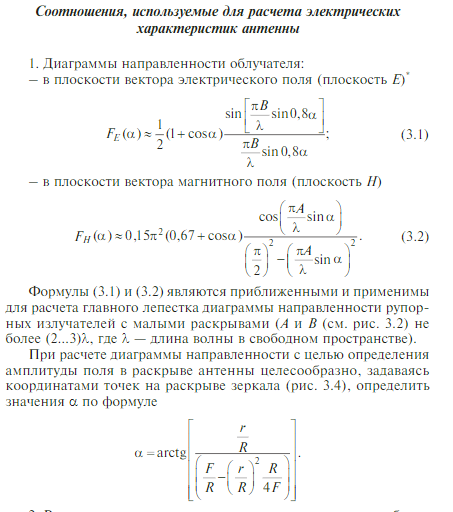

In [18]:
F_E = lambda alpha, B: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
F_H = lambda alpha, A: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)
tol = 1e-3

In [19]:
F_E_B = lambda B: 20*log(F_E(varphi_2,B)) + 10
#F_E_B(89*const.milli)
B = opt.root(F_E_B,100*const.milli,tol = tol)["x"][0]
B

0.1349060937603086

In [20]:
F_H_A = lambda A: 20*log(F_H(varphi_2,A)) + 10
#F_H_A(89*const.milli)
A = opt.root(F_H_A,100*const.milli,tol = tol)["x"][0]
A

0.1459178420909552

In [21]:
#A = 90*const.milli
#B = 90*const.milli
F_E = lambda alpha: 1/2*(1 + cos(alpha))*sin((pi*B)/(lambda_lim) * sin(0.8*alpha))/(pi*B/lambda_lim*sin(0.8*alpha))
F_H = lambda alpha: 0.15*pi**2*(0.67 + cos(alpha))*cos(pi*A/lambda_lim*sin(alpha))/((pi/2)**2 - (pi*A/lambda_lim*sin(alpha))**2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in log


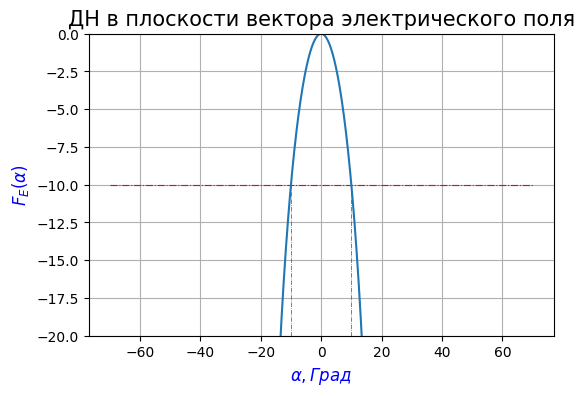

In [22]:
alpha = np.linspace(radians(-70),radians(+70),1000)
conv_alpha = list(map(degrees,alpha))



plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),-20,-10,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),-20,-10,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(-10,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot((conv_alpha), 20*np.log(np.vectorize(F_E)(alpha)), label='$F_E(\alpha)$')



plt.title("ДН в плоскости вектора электрического поля", fontsize=15)
plt.xlabel('$α, Град$', fontsize=12, color='blue')
plt.ylabel('$F_E(α)$', fontsize=12, color='blue')

plt.ylim([-20,0])
#plt.legend()
plt.grid(True)
#plt.text(15, 4, 'grow up!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log


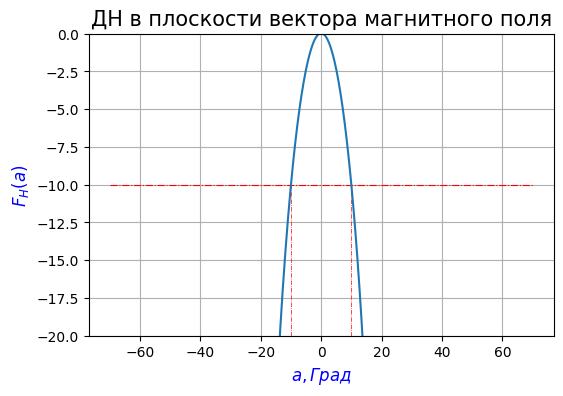

In [23]:
plt.figure(dpi=100,figsize=(6,4))

plt.vlines(degrees(varphi_2),-20,-10,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.vlines(degrees(-varphi_2),-20,-10,
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.5,
           )

plt.hlines(-10,min(conv_alpha),max(conv_alpha),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot(conv_alpha, 20*np.log(np.vectorize(F_H)(alpha)), label='$F_E(\alpha)$')



plt.title("ДН в плоскости вектора магнитного поля", fontsize=15)
plt.xlabel('$a, Град$', fontsize=12, color='blue')
plt.ylabel('$F_H(a)$', fontsize=12, color='blue')
#plt.legend()
plt.ylim([-20,0])
plt.grid(True)
#plt.text(15, 4, 'grow up!')

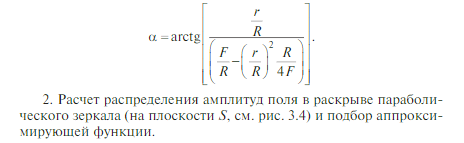

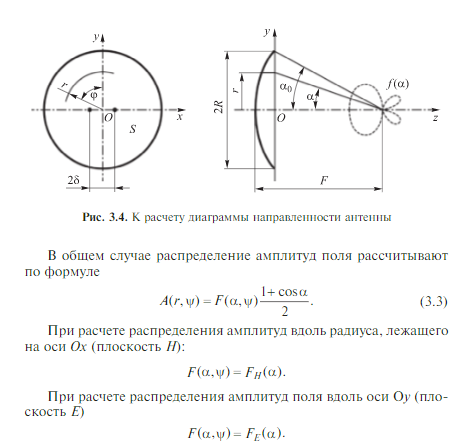

In [24]:
R = D_0/2
F_ = F_eqv
alpha = lambda r: atan((r/R)/(F_/R - (r/R)**2*R/(4*F_)))
A_E = lambda r: (1 + cos(alpha(r)))/4*F_E(alpha(r))
A_H = lambda r: (1 + cos(alpha(r)))/4*F_H(alpha(r))
#A = lambda r: A_E(r) + A_H(r) 
r = np.linspace(-R,R,1000)

In [25]:
data_A_E = list(map(A_E,r))
data_A_H = list(map(A_H,r))

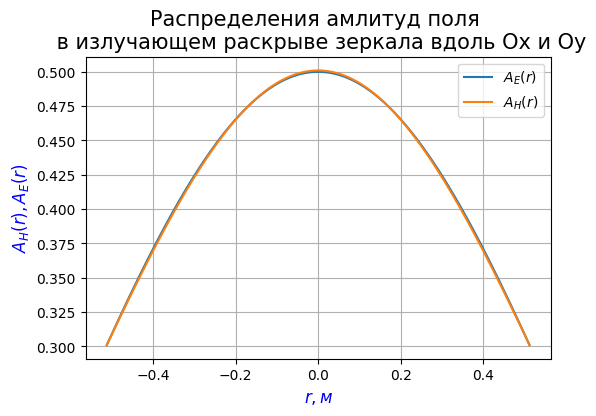

In [26]:
plt.figure(dpi=100,figsize=(6,4))
plt.plot(r, data_A_E, label='$A_E(r)$')
plt.plot(r, data_A_H, label='$A_H(r)$')
plt.title("Распределения амлитуд поля \n в излучающем раскрыве зеркала вдоль Ox и Оу", fontsize=15)
plt.xlabel('$r,м$', fontsize=12, color='blue')
plt.legend()
plt.ylabel('$A_H(r),A_E(r)$', fontsize=12, color='blue')
plt.grid(True)

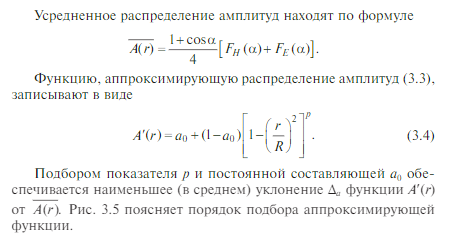

In [27]:
data_A_E = np.array(data_A_E)
data_A_H = np.array(data_A_H)
data_A = data_A_E + data_A_H
#len(data_A),len(r)

In [28]:
a_0 = A_E(R) + A_H(R)
A_prime = lambda r,p: a_0 + (1 - a_0)*(1 - (r/R)**2)**p
#opt_A_prime = lambda x,a: A_prime(x,a)
#min_func = lambda p: data_A - np.array([A_prime(p,i) for i in r])
#min_func = lambda p: data_A -  a_0 + (1 - a_0)*p
p = opt.curve_fit(A_prime,r,data_A)
#min_func(1)
#round(p[0][0],0)
p
#p = round(p[0][0],5)

(array([1.12761712]), array([[5.66582571e-07]]))

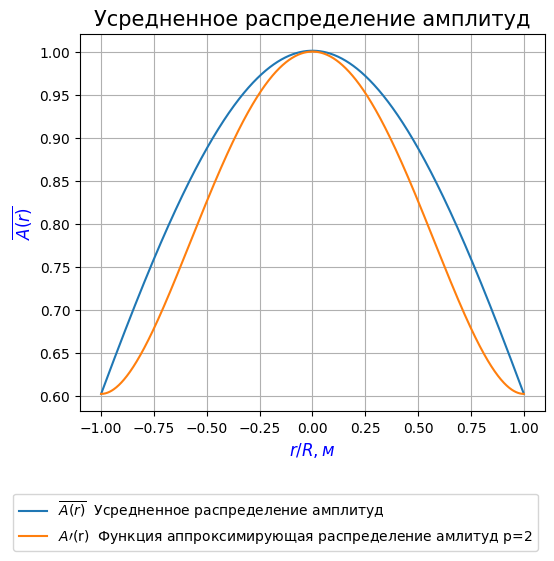

In [29]:
plt.figure(figsize=(6,5),dpi = 100)
plt.plot(r/R, data_A, label='$\overline{A(r)}$  Усредненное распределение амплитуд')
#plt.plot(r/R, A_prime(r,round(p[0][0],0)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],0)}')
#plt.plot(r/R, A_prime(r,round(p[0][0],5)), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={round(p[0][0],5)}')
plt.plot(r/R, A_prime(r,2), label= f'$A\prime$(r)  Функция аппроксимирующая распределение амлитуд p={2}')
plt.title("Усредненное распределение амплитуд", fontsize=15)
plt.xlabel('$r/R,м$', fontsize=12, color='blue')
plt.legend(bbox_to_anchor=(1, -0.2))
plt.ylabel('$\overline{A(r)}$', fontsize=12, color='blue')
plt.grid(True)

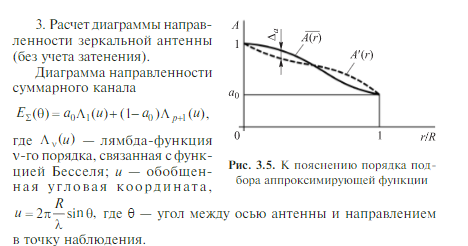

In [30]:
lmbda = lambda nu,u: round(abs(sp.lmbda(nu,u)[0][int(nu)]*1e3),0) #лямбда функция
u = lambda theta: 2*pi*R/lambda_lim*sin(theta) #обобщенная угловая координата
#E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(int(round(p[0][0],5)),u(theta))#ДН суммарного канала
E_sum_theta = lambda theta: a_0*lmbda(1,u(theta)) + (1 - a_0)*lmbda(2,u(theta))#ДН суммарного канала

#E_sum_theta = lambda theta: a_0*sp.lmbda(1,2*pi*R/lambda_lim*sin(theta)) + (1 - a_0)*sp.lmbda(1.5,2*pi*R/lambda_lim*sin(theta))#ДН суммарного канала
#E_sum_theta = lambda theta: a_0*sp.jv(1,u(theta))/u(theta) #+ (1 - a_0)*2**(p + 1)*sp.jv(p + 1,u(theta))*sp.gamma(p + 1)/u(theta) #ДН суммарного канала


theta = np.linspace(radians(-20), radians(20),1000)
data_E_sum_theta = 20*np.log10(np.array(list(map(E_sum_theta,theta))))

data_E_sum_theta = data_E_sum_theta - max(data_E_sum_theta) #нормировка ДН
theta = np.array(list(map(degrees,theta)))#конвертация радиан в градусы

In [31]:
#sp.lmbda(1,5),sp.lmbda(1.4,5),sp.jv(1.4,5),sp.gamma(1.4)

In [32]:
#for i in range(len(data_E_sum_theta)):
#  if data_E_sum_theta[i] < -15:
#   data_E_sum_theta[i] -=5

(-40.0, 0.0)

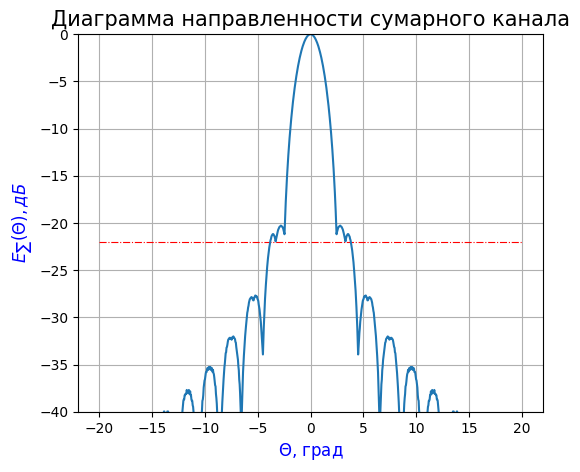

In [33]:
plt.figure(figsize=(6,5),dpi = 100)

plt.hlines(-22,min(theta),max(theta),
         color = "red",
         linestyle = "dashdot",
         linewidth = 0.8,
           )

plt.plot(theta, data_E_sum_theta, label='$\overline{A(r)}$')


plt.title("Диаграмма направленности сумарного канала", fontsize=15)
plt.xlabel('$Θ$, град', fontsize=12, color='blue')
#plt.legend()
plt.ylabel('$E_{\sum}(Θ), дБ$', fontsize=12, color='blue')
plt.grid(True)
plt.ylim([-40,0])

# Расчет КНД

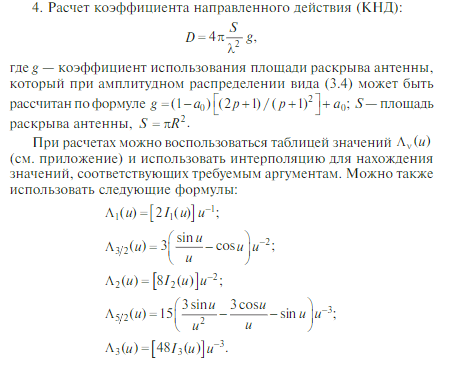

In [34]:
S = const.pi*R**2
g = (1 - a_0)*(2*p[0] + 1)/(p[0] + 1)**2 + a_0
D = 4*const.pi*S/lambda_lim**2*g

In [35]:
D[0],20*log10(D[0])

(7071.850260002621, 76.9906611262342)